In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter

In [3]:
data_3 = np.loadtxt('exp_results/PV_3folds_R10_new.csv', skiprows = 2, delimiter = ',', usecols=(0,1,3,4,5))

vol_all = data_3[:,0]
vol_3 = vol_all
pressure_all = np.mean(data_3[:,1:], axis = 1)
pressure_3 = pressure_all

R_3 = 10 #mm
H_3 = 27 #mm

vol_0 = np.pi * R_3 * R_3 * H_3 * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
vol_03 = vol_0


fitting 3folds [final]

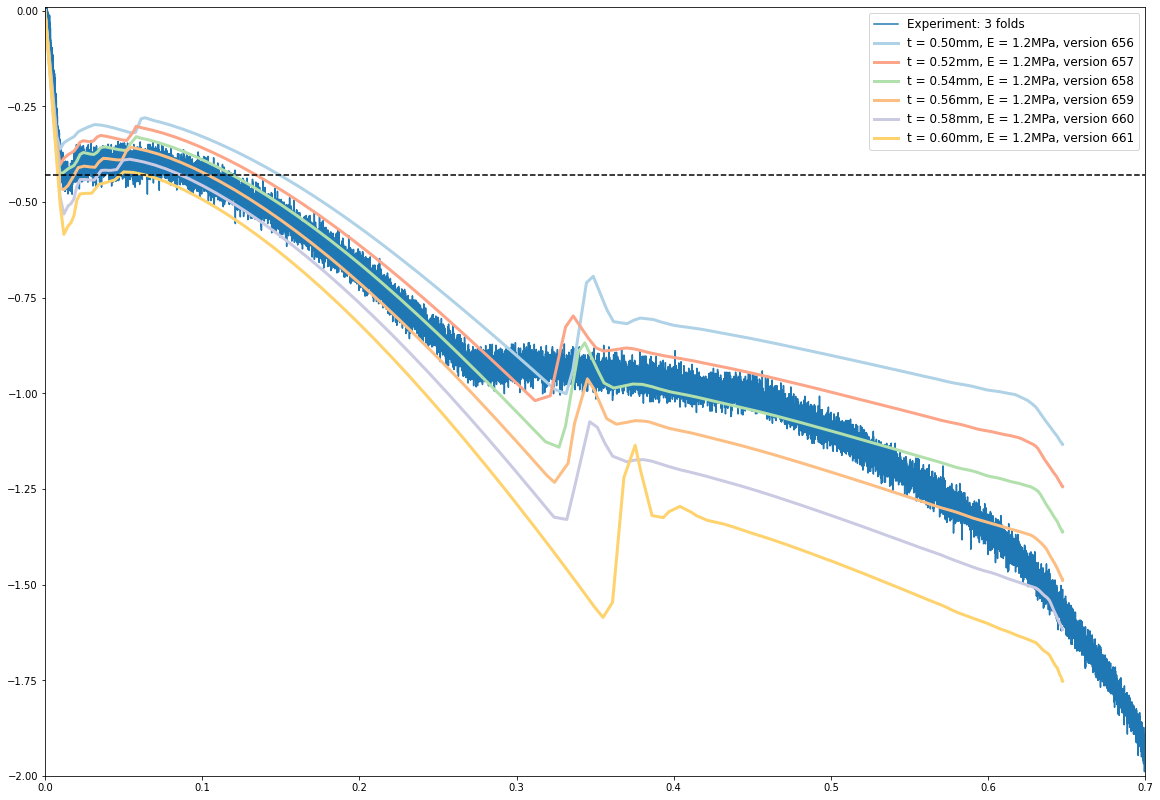

In [33]:
E_try = [1.1, 1.2, 1.3, 1.4]
t_try = [0.50, 0.52, 0.54, 0.56, 0.58, 0.6]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (16,11), constrained_layout = True)
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

initial_idx = 650

eps = -0.009
exp_in = 'exp_results'
num_folds = 3
p_cr = 0.384
# exp_res = np.load(f'{exp_in}/PV_{num_folds}folds_smoothed.npz')
# ax.plot(exp_res['vol_norm'] + eps, exp_res['pressure_mean'], linewidth = 3, label = f'experiment {num_folds}folds')
# ax.fill_between(exp_res['vol_norm'] + eps, exp_res['pressure_mean'] - exp_res['pressure_std'], exp_res['pressure_mean'] + exp_res['pressure_std'], alpha = 0.3)

ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        if E == 1.2:
            idx_cur = initial_idx + len(t_try)*j + i
            data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
            vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
            pressure_kpa = data_cur[:,1] * 1e3

            color_plot = plt.get_cmap(cmap_all[i])((j/(len(t_try) - 1))*0.85 + 0.15)
            ax.plot(vol_norm,pressure_kpa, label = f't = {t:.2f}mm, E = {E:.1f}MPa, version {idx_cur}', color = color_plot,
                linewidth = 3)
ax.hlines(-0.43, 0, 0.7, 'k', '--')
ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -2)

fig.savefig('scream yi/3folds_fitting.png', facecolor = 'white')

(-2.0, 0.01)

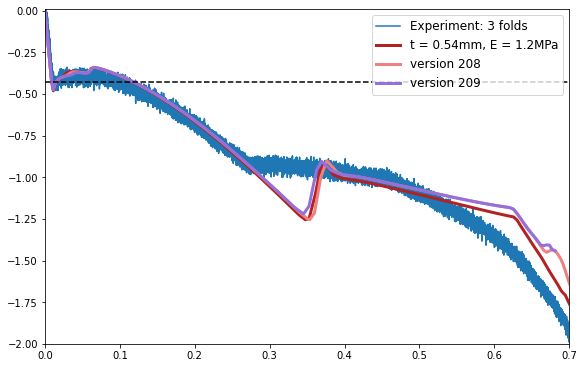

In [43]:

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (8,5), constrained_layout = True)
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

exp_in = 'exp_results'
num_folds = 3
p_cr = 0.384
E = 1.2
t = 0.54
# exp_res = np.load(f'{exp_in}/PV_{num_folds}folds_smoothed.npz')
# ax.plot(exp_res['vol_norm'] + eps, exp_res['pressure_mean'], linewidth = 3, label = f'experiment {num_folds}folds')
# ax.fill_between(exp_res['vol_norm'] + eps, exp_res['pressure_mean'] - exp_res['pressure_std'], exp_res['pressure_mean'] + exp_res['pressure_std'], alpha = 0.3)

ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

idx_cur = 201
data_cur = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'firebrick'
ax.plot(vol_norm,pressure_kpa, label = f't = {t:.2f}mm, E = {E:.1f}MPa', color = color_plot,linewidth = 3)

############################

# idx_cur = 207 #[FORMED 4FOLDS NOT VALID]
# data_cur = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt')
# vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
# pressure_kpa = data_cur[:,1] * 1e3

# color_plot = 'lightcoral'
# ax.plot(vol_norm,pressure_kpa, label = f't = {t:.2f}mm, E = {E:.1f}MPa', color = color_plot,linewidth = 3)

########################33
idx_cur = 208 #theta = 4pi/3
data_cur = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'lightcoral'
ax.plot(vol_norm,pressure_kpa, label = f'version {idx_cur}', color = color_plot,linewidth = 3)

######################
idx_cur = 209 #theta = pi
data_cur = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'mediumpurple'
ax.plot(vol_norm,pressure_kpa, label = f'version {idx_cur}', color = color_plot,linewidth = 3)

            
ax.hlines(-0.43, 0, 0.7, 'k', '--')
ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -2)

# fig.savefig('scream yi/3folds_fitting.png', facecolor = 'white')

(-2.0, 0.0)

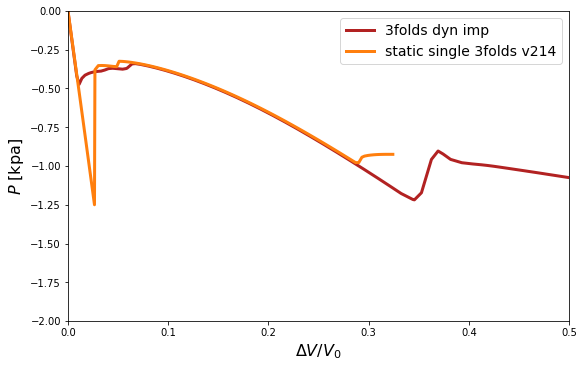

In [6]:
fig, ax = plt.subplots(figsize = (8,5), constrained_layout = True)

idx_cur = 204
cvol, pcav = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt', unpack = True)
vol_norm = -(cvol - cvol[0])/cvol[0]
pressure_kpa = pcav * 1e3

color_plot = 'firebrick'
ax.plot(vol_norm,pressure_kpa, label = f'3folds dyn imp', color = color_plot,linewidth = 3)

idx_cur = 214
cvol, pcav = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt', unpack = True)
vol_norm = -(cvol - cvol[0])/cvol[0]
pressure_kpa = pcav * 1e3

ax.plot(vol_norm,pressure_kpa, label = f'static single 3folds v{idx_cur}', color = 'tab:orange', linewidth = 3)

ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-2,0)

(0.0, 0.7)

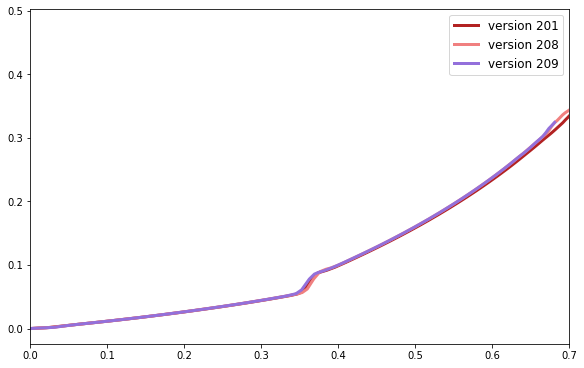

In [38]:

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (8,5), constrained_layout = True)
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

exp_in = 'exp_results'
num_folds = 3
p_cr = 0.384
E = 1.2
t = 0.54
# exp_res = np.load(f'{exp_in}/PV_{num_folds}folds_smoothed.npz')
# ax.plot(exp_res['vol_norm'] + eps, exp_res['pressure_mean'], linewidth = 3, label = f'experiment {num_folds}folds')
# ax.fill_between(exp_res['vol_norm'] + eps, exp_res['pressure_mean'] - exp_res['pressure_std'], exp_res['pressure_mean'] + exp_res['pressure_std'], alpha = 0.3)

# ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 3 folds')
# cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

idx_cur = 201
cvol, pcav = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt', unpack = True)
t_all, contraction_all, twist_all = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_contraction_twist.txt', unpack = True)
vol_norm = -(cvol - cvol[0])/cvol[0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'firebrick'
# ax.plot(vol_norm,pressure_kpa, label = f't = {t:.2f}mm, E = {E:.1f}MPa', color = color_plot,linewidth = 3)
ax.plot(vol_norm, 1 - contraction_all, label = f'version {idx_cur}', color = color_plot, linewidth = 3)
############################

# idx_cur = 207 #[FORMED 4FOLDS NOT VALID]
# data_cur = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt')
# vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
# pressure_kpa = data_cur[:,1] * 1e3

# color_plot = 'lightcoral'
# ax.plot(vol_norm,pressure_kpa, label = f't = {t:.2f}mm, E = {E:.1f}MPa', color = color_plot,linewidth = 3)

########################33
idx_cur = 208 #theta = 4pi/3
cvol, pcav = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt', unpack = True)
t_all, contraction_all, twist_all = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_contraction_twist.txt', unpack = True)
vol_norm = -(cvol - cvol[0])/cvol[0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'lightcoral'
# ax.plot(vol_norm,pressure_kpa, label = f'version {idx_cur}', color = color_plot,linewidth = 3)
ax.plot(vol_norm, 1 - contraction_all, label = f'version {idx_cur}', color = color_plot, linewidth = 3)

######################
idx_cur = 209 #theta = pi
cvol, pcav = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt', unpack = True)
t_all, contraction_all, twist_all = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_contraction_twist.txt', unpack = True)
vol_norm = -(cvol - cvol[0])/cvol[0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'mediumpurple'
# ax.plot(vol_norm,pressure_kpa, label = f'version {idx_cur}', color = color_plot,linewidth = 3)
ax.plot(vol_norm, 1 - contraction_all, label = f'version {idx_cur}', color = color_plot, linewidth = 3)

            
# ax.hlines(-0.43, 0, 0.7, 'k', '--')
ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
# ax.set_ylim(top = 0.01, bottom = -2)

# fig.savefig('scream yi/3folds_fitting.png', facecolor = 'white')

(0.0, 0.7)

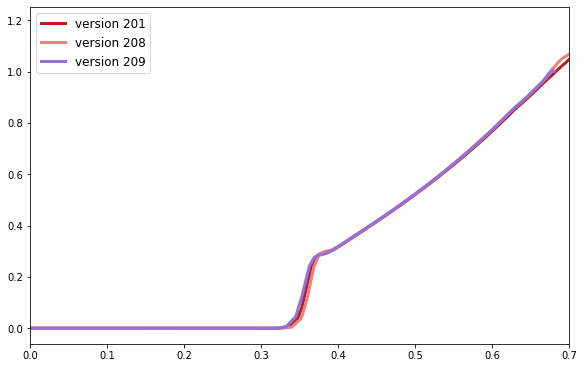

In [41]:

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (8,5), constrained_layout = True)
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])

exp_in = 'exp_results'
num_folds = 3
p_cr = 0.384
E = 1.2
t = 0.54
# exp_res = np.load(f'{exp_in}/PV_{num_folds}folds_smoothed.npz')
# ax.plot(exp_res['vol_norm'] + eps, exp_res['pressure_mean'], linewidth = 3, label = f'experiment {num_folds}folds')
# ax.fill_between(exp_res['vol_norm'] + eps, exp_res['pressure_mean'] - exp_res['pressure_std'], exp_res['pressure_mean'] + exp_res['pressure_std'], alpha = 0.3)

# ax.plot(vol_all/vol_0, pressure_all, label = 'Experiment: 3 folds')
# cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

idx_cur = 201
cvol, pcav = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt', unpack = True)
t_all, contraction_all, twist_all = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_contraction_twist.txt', unpack = True)
vol_norm = -(cvol - cvol[0])/cvol[0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'firebrick'
# ax.plot(vol_norm,pressure_kpa, label = f't = {t:.2f}mm, E = {E:.1f}MPa', color = color_plot,linewidth = 3)
ax.plot(vol_norm, -twist_all, label = f'version {idx_cur}', color = color_plot, linewidth = 3)
############################

# idx_cur = 207 #[FORMED 4FOLDS NOT VALID]
# data_cur = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt')
# vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
# pressure_kpa = data_cur[:,1] * 1e3

# color_plot = 'lightcoral'
# ax.plot(vol_norm,pressure_kpa, label = f't = {t:.2f}mm, E = {E:.1f}MPa', color = color_plot,linewidth = 3)

########################33
idx_cur = 208 #theta = 4pi/3
cvol, pcav = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt', unpack = True)
t_all, contraction_all, twist_all = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_contraction_twist.txt', unpack = True)
vol_norm = -(cvol - cvol[0])/cvol[0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'lightcoral'
# ax.plot(vol_norm,pressure_kpa, label = f'version {idx_cur}', color = color_plot,linewidth = 3)
ax.plot(vol_norm, twist_all, label = f'version {idx_cur}', color = color_plot, linewidth = 3)

######################
idx_cur = 209 #theta = pi
cvol, pcav = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_pcav_cvol.txt', unpack = True)
t_all, contraction_all, twist_all = np.loadtxt(f'data_out/sim-long-3folds-{idx_cur}_contraction_twist.txt', unpack = True)
vol_norm = -(cvol - cvol[0])/cvol[0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'mediumpurple'
# ax.plot(vol_norm,pressure_kpa, label = f'version {idx_cur}', color = color_plot,linewidth = 3)
ax.plot(vol_norm, -twist_all, label = f'version {idx_cur}', color = color_plot, linewidth = 3)

            
# ax.hlines(-0.43, 0, 0.7, 'k', '--')
ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.7)
# ax.set_ylim(top = 0.01, bottom = -2)

# fig.savefig('scream yi/3folds_fitting.png', facecolor = 'white')

nu sweep 3folds

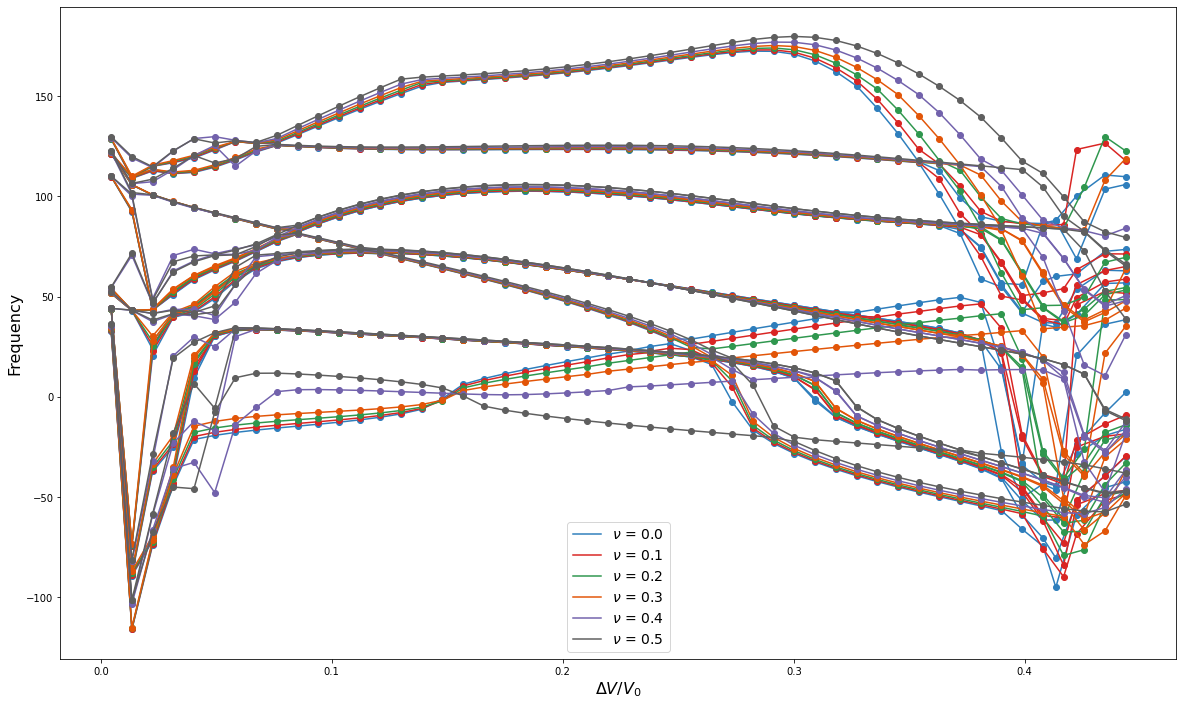

In [47]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 810

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,nu in enumerate(nu_try):
    if nu >= 0:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            # freq_rescale = freq_all[:,j]
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)


fig.savefig('data_processed/change_nu_3folds_freq.jpg')


static sweep 3folds (2 ranges)

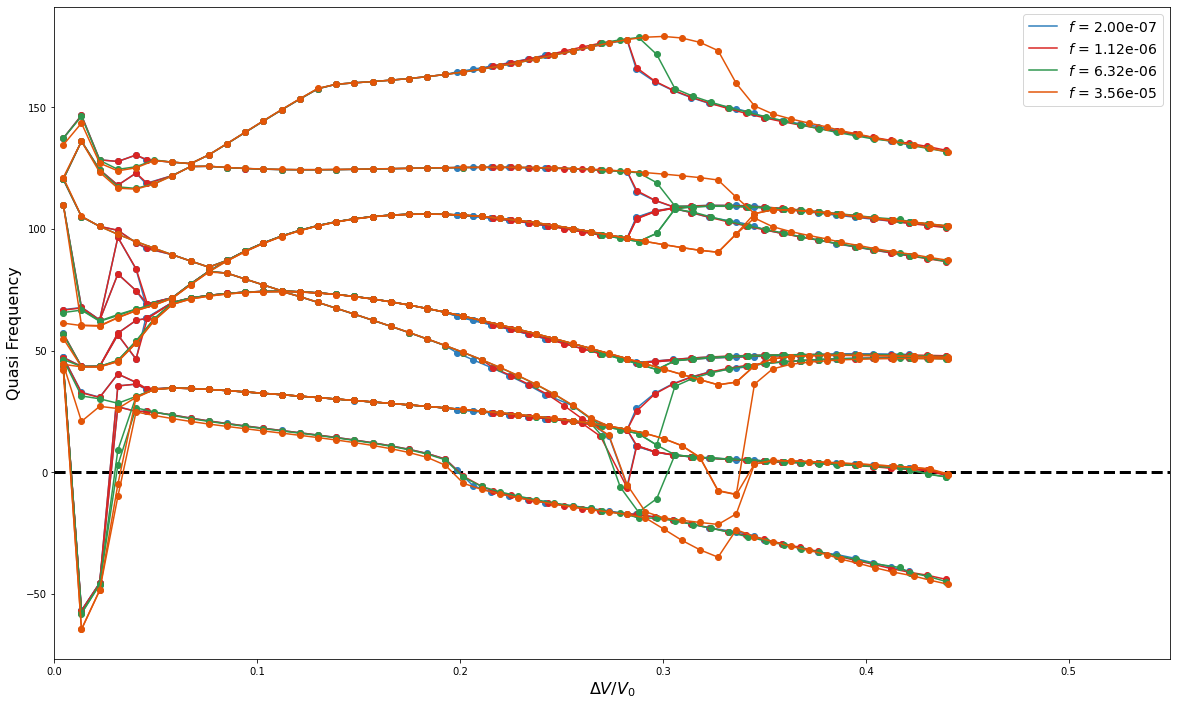

In [33]:
damping_sweep = 2*np.logspace(-7, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 220

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 4:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.55)


fig.savefig('data_processed/static_stable_3folds.jpg')


(-1.5, 0.0)

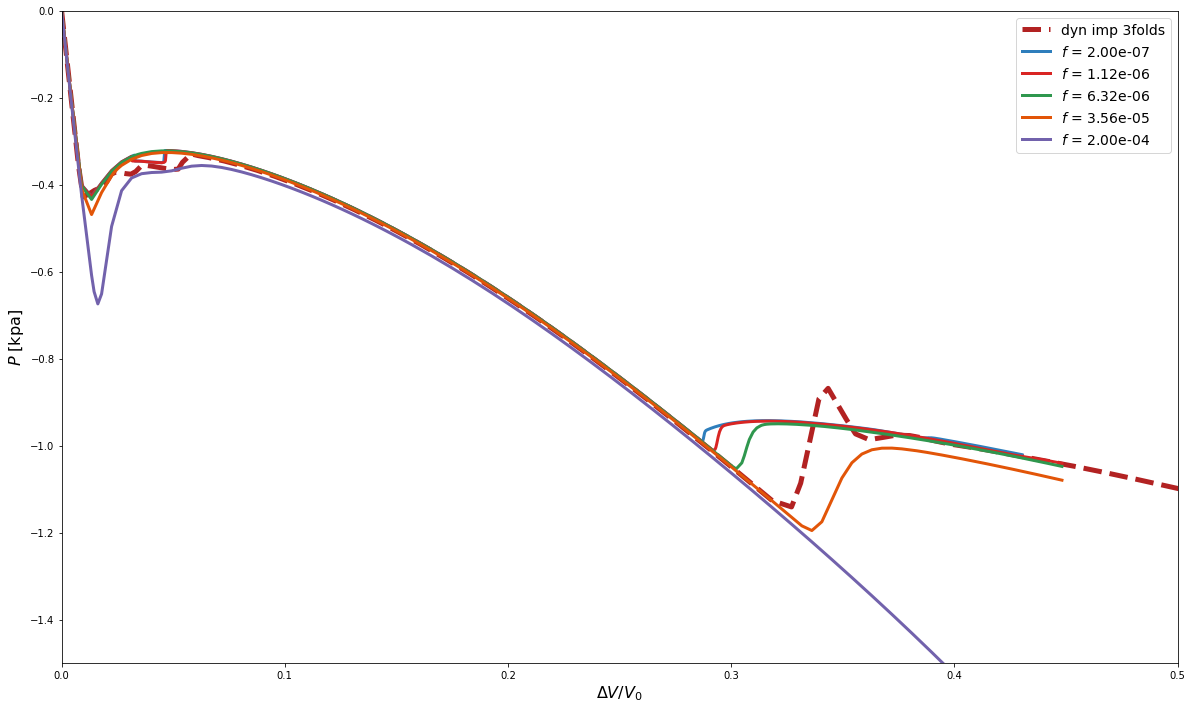

In [31]:
damping_sweep = 2*np.logspace(-7, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 220

idx_cur = 658
data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 3folds', color = 'firebrick', linewidth = 5)

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']


for i,stab_fac in enumerate(damping_sweep):
    try:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
        data_cur = np.loadtxt(data_path)
        
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        ax.plot(vol_norm,pressure_kpa, label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 3)
    except: pass



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-1.5,0)

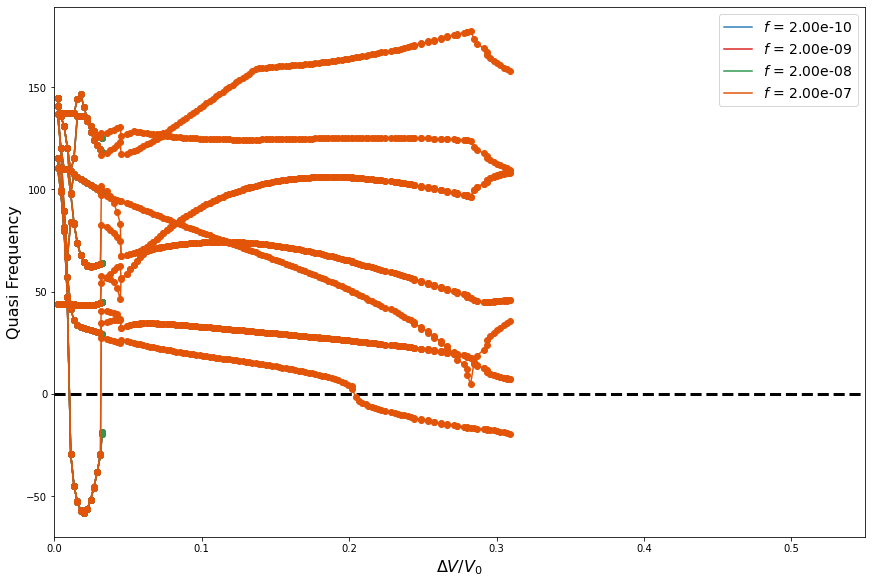

In [74]:
damping_sweep = 2*np.logspace(-10, -6, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

initial_idx = 250

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 4:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.55)
# ax.set_xlim(0.25,0.35)


fig.savefig('data_processed/static_stable_3folds.png', facecolor = 'white')



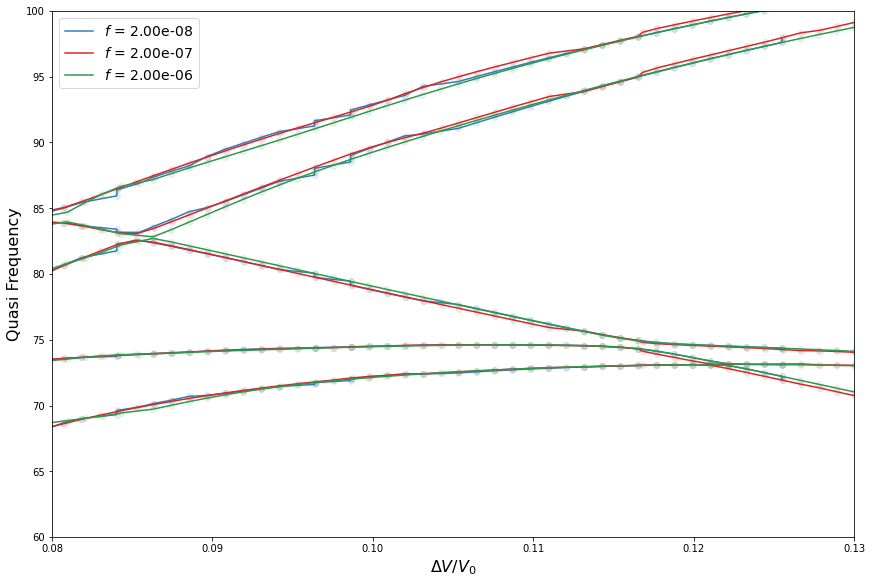

In [87]:
damping_sweep = 2*np.logspace(-8, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (12,8), constrained_layout = True)

initial_idx = 260

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 3:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot, alpha = 0.1)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.55)
ax.set_xlim(0.08, 0.13)
ax.set_ylim(60,100)



fig.savefig('data_processed/static_stable_3folds.png', facecolor = 'white')



(-1.5, 0.0)

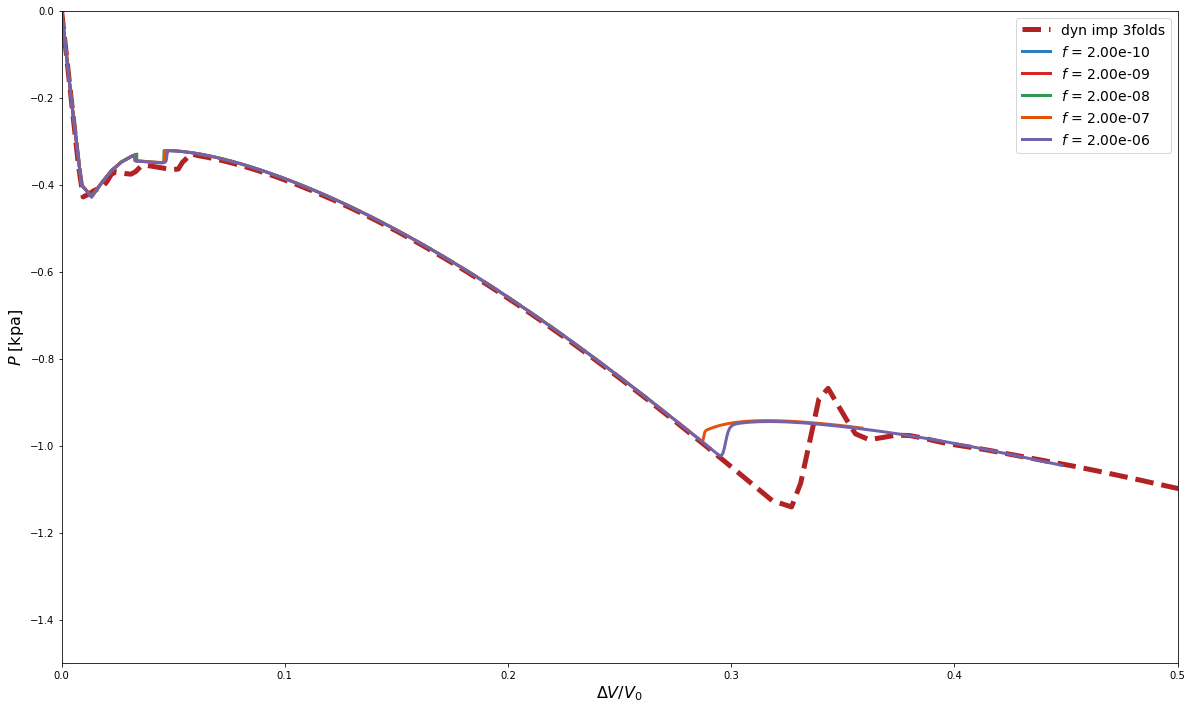

In [30]:
damping_sweep = 2*np.logspace(-10, -6, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 230

idx_cur = 658
data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3
# print(data_cur[0,0])

ax.plot(vol_norm,pressure_kpa, '--', label = 'dyn imp 3folds', color = 'firebrick', linewidth = 5)

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']


for i,stab_fac in enumerate(damping_sweep):
    if i < 5:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_static-stable-{idx_cur}_pcav_cvol.txt'
        data_cur = np.loadtxt(data_path)
        
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        ax.plot(vol_norm,pressure_kpa, label = rf'$f$ = {stab_fac:.2e}', color = color_plot, linewidth = 3)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('$P$ [kpa]', fontsize = 16)
ax.set_xlim(0,0.5)
ax.set_ylim(-1.5,0)

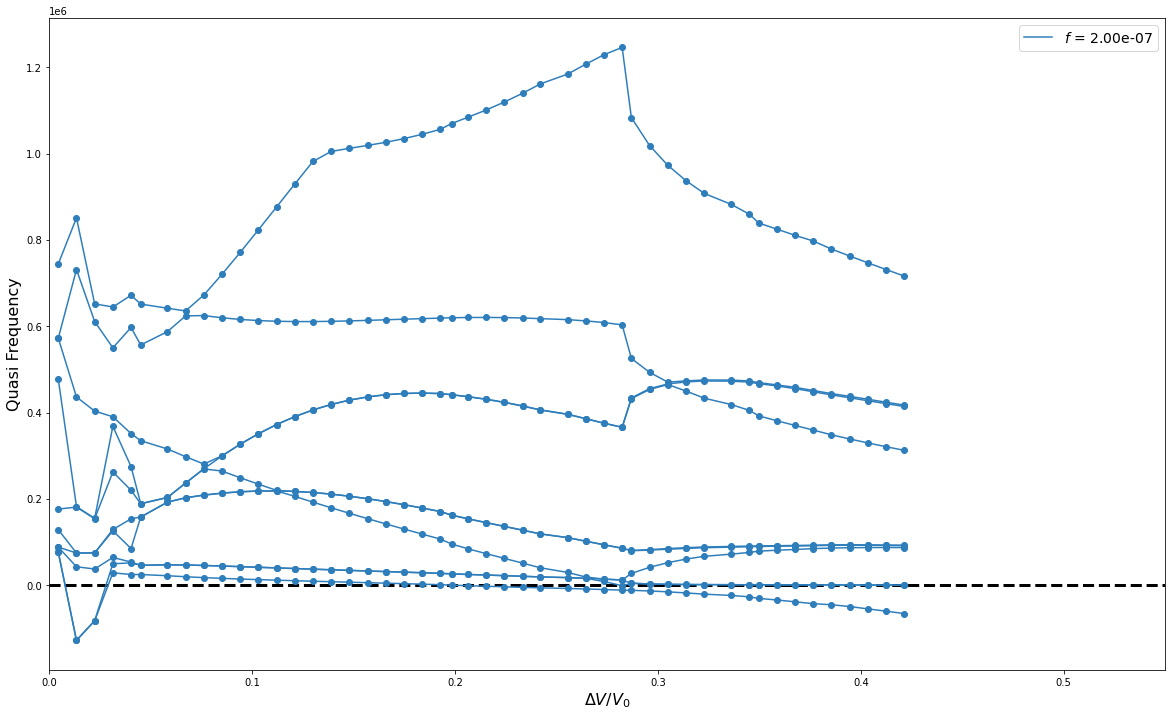

In [8]:
damping_sweep = 2*np.logspace(-7, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 220

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 1:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            # freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            freq_rescale = freq_all[:,j]
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.55)


fig.savefig('data_processed/static_stable_3folds.jpg')


Text(0, 0.5, 'Frequency')

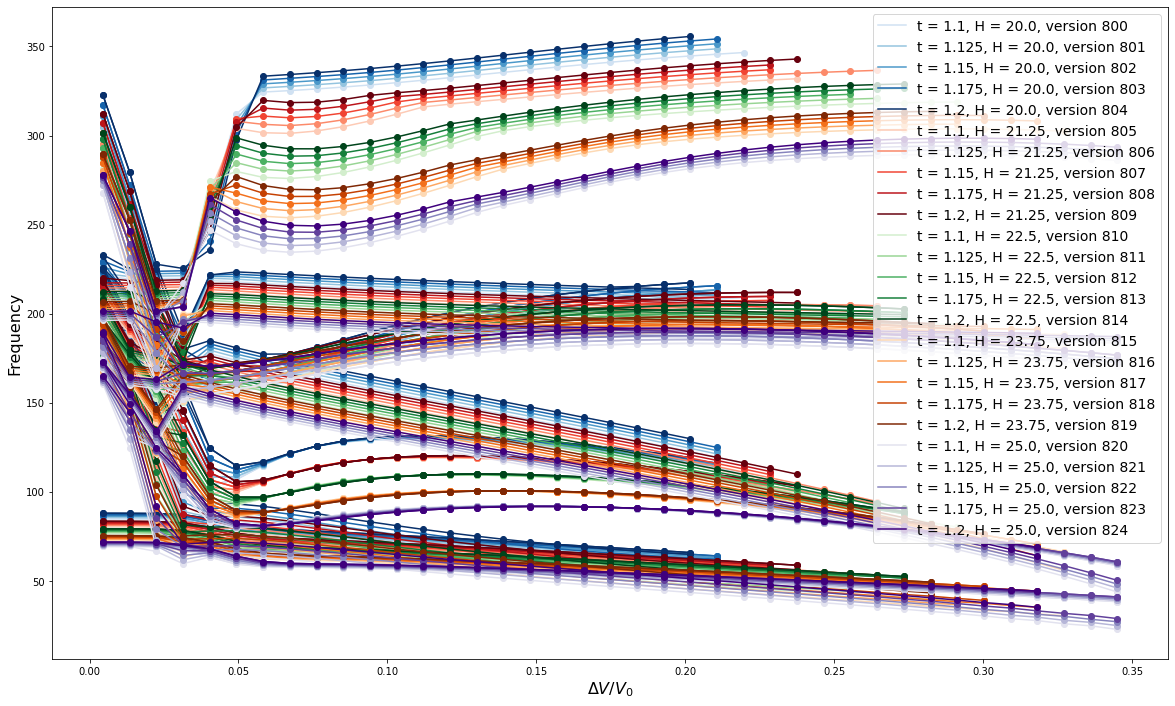

In [51]:
R_try = [10]
H_try = np.linspace(20,25,5)
t_try = np.linspace(1.1,1.2,5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 800

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,H in enumerate(H_try):
    for j, t in enumerate(t_try):
        idx_cur = initial_idx + j + i*len(t_try)
        data_path = f'data_out/3fold-geo-test-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])((j+1)/len(t_try))

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            # freq_rescale = freq_all[:,j]
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = f't = {t}, H = {H}, version {idx_cur}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)


# fig.savefig('data_processed/change_nu_3folds_freq.jpg')


In [ ]:
R_try = [10]
H_try = np.linspace(20,25,5)
t_try = np.linspace(1.1,1.2,5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 710

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,H in enumerate(H_try):
    for j, t in enumerate(t_try):
        idx_cur = initial_idx + j + i*len(t_try)
        data_path = f'data_out/2fold-test_nu-{idx_cur}_eig_freq.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.hlines(0,0,0.45,'k','--')

fig.savefig('data_processed/change_nu_2folds_freq.jpg')


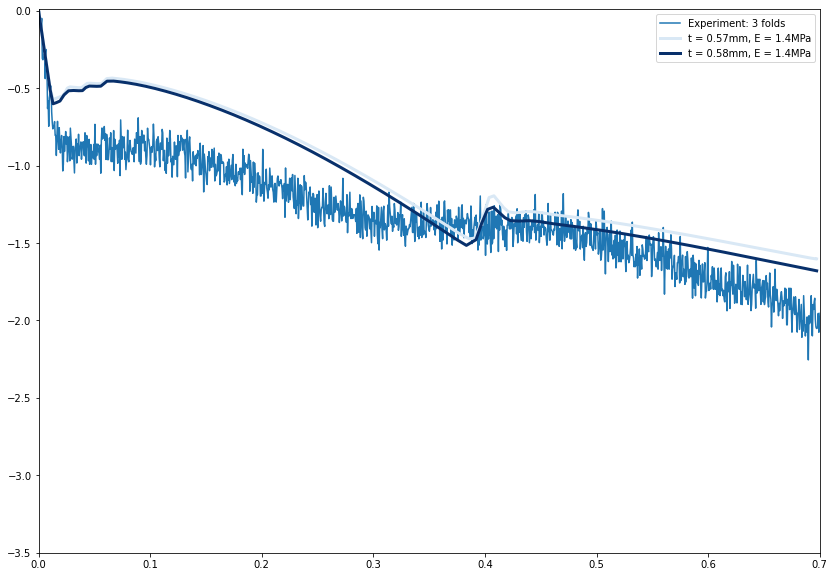

In [13]:
E_try = [1.4]
# t_try = [0.54,0.56,0.58,0.60,0.62,0.64]
t_try = [0.57,0.58]
initial_idx = 410

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03-0.015, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']

for i, E in enumerate(E_try):
    for j, t in enumerate(t_try):
        idx_cur = initial_idx + len(E_try)*i + j
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1)*0.85+0.15)
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)
        
ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3.5)

fig.savefig('scream yi/3folds_exp_vs_sims.png')

(-3.0, 0.01)

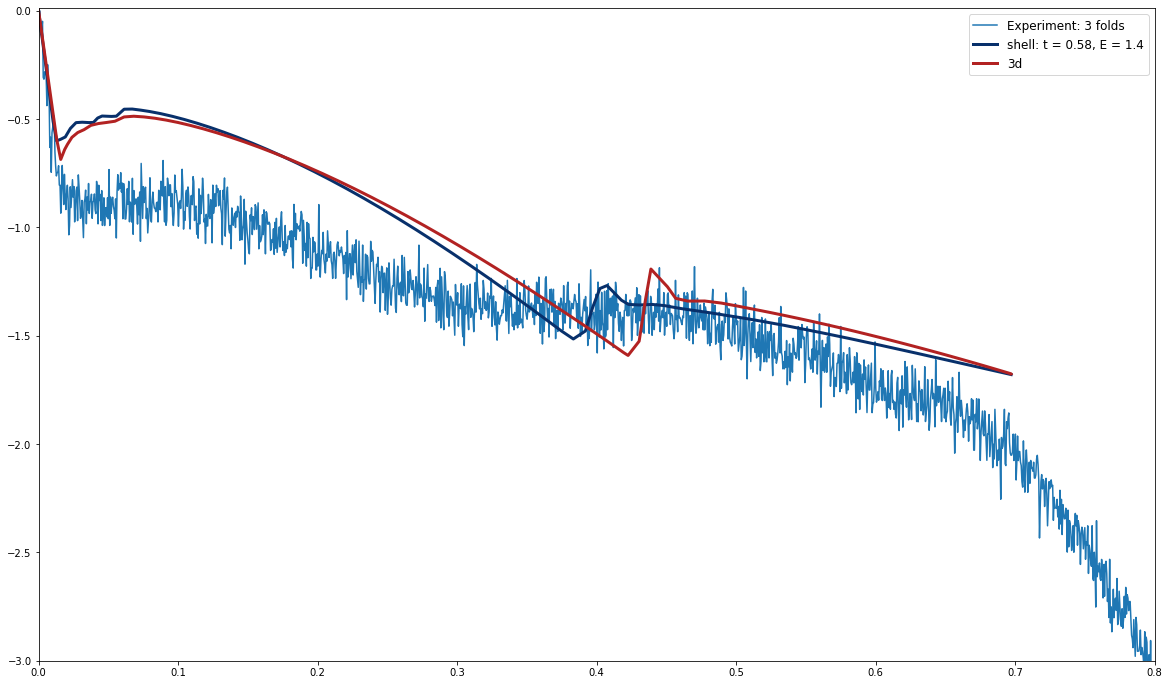

In [4]:
E_try = [1.4]
# t_try = [0.54,0.56,0.58,0.60,0.62,0.64]
t_try = [0.58]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 411


ax.plot(vol_3/vol_03-0.015, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'YlOrBr', 'BuGn', 'PuRd']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(t_try)*j + i
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])((j+1)/(len(E_try)))
        # print(j/(len(E_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f'shell: t = {t}, E = {E}', color = color_plot,
            linewidth = 3)

idx_cur = 101
data_cur = np.loadtxt(f'data_out/3fold-test_3d-v{idx_cur}_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

color_plot = 'firebrick'
# print(j/(len(E_try) - 1))
ax.plot(vol_norm,pressure_kpa, label = f'3d', color = color_plot,
    linewidth = 3)

ax.legend(loc = 'best', fontsize = 12)
ax.set_xlim(left = 0, right = 0.8)
ax.set_ylim(top = 0.01, bottom = -3)

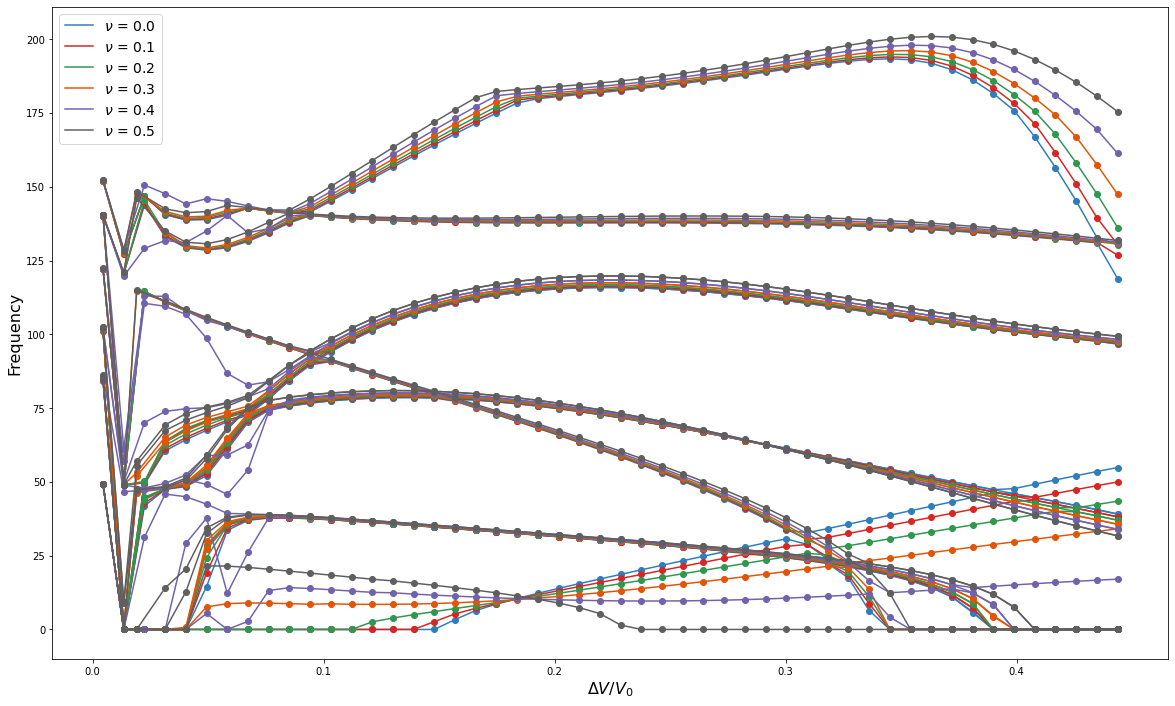

In [19]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 640

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_nu-{idx_cur}_eig_freq.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)


fig.savefig('data_processed/change_nu_3folds_freq.jpg')


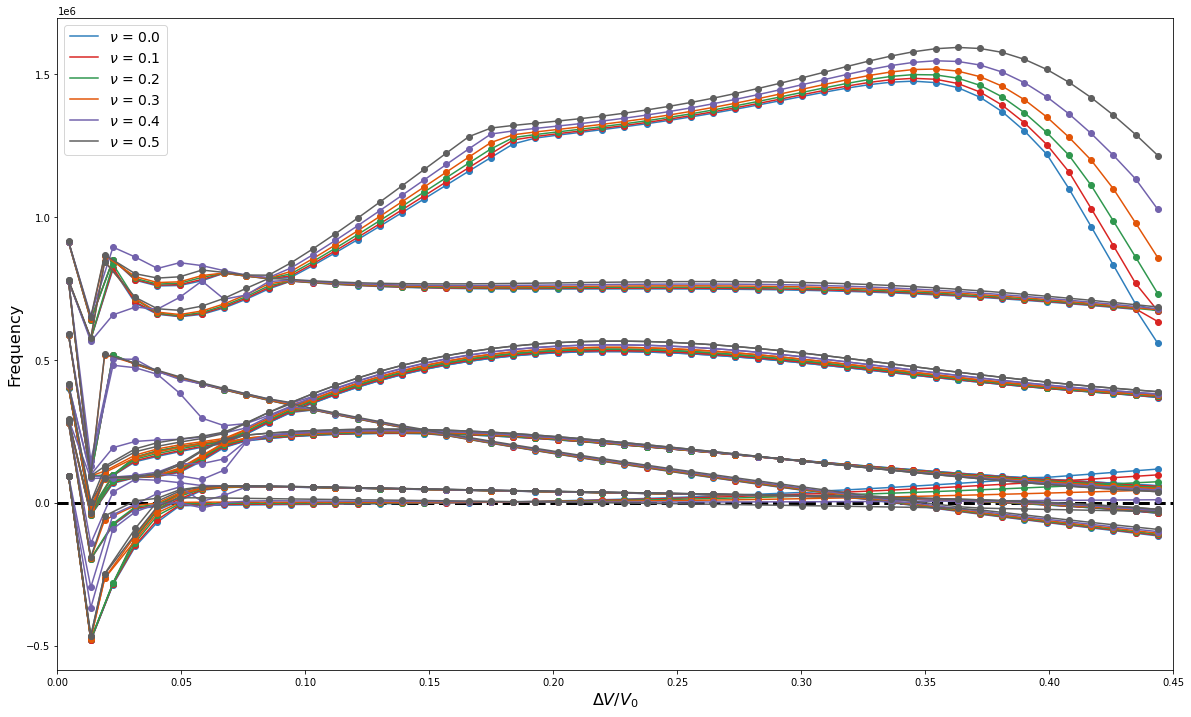

In [35]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 640

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

ax.hlines(0,0,0.45, 'k', '--', linewidth = 3)

for i,nu in enumerate(nu_try):
    if nu <= 0.5:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)
ax.set_xlim(0,0.45)


fig.savefig('data_processed/change_nu_3folds_eigval.jpg')


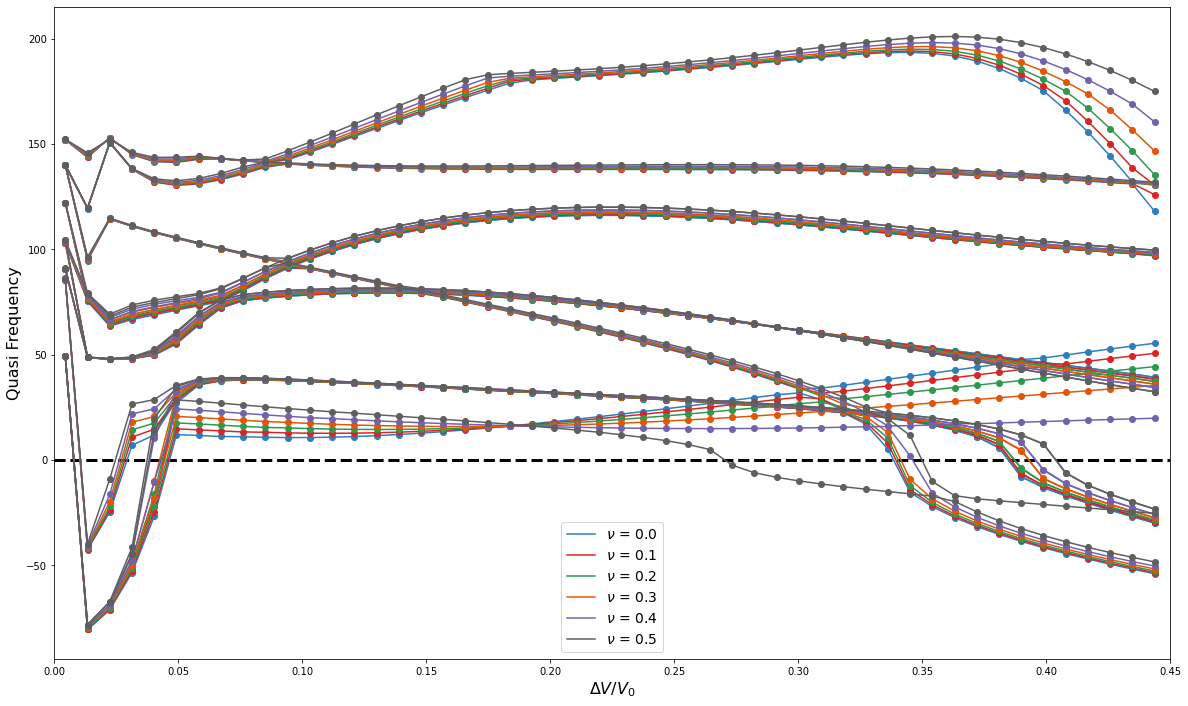

In [22]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 660

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

ax.hlines(0,0,0.45, 'k', '--', linewidth = 3)

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.45)


fig.savefig('data_processed/change_nu_3folds_eigval_scale.jpg')


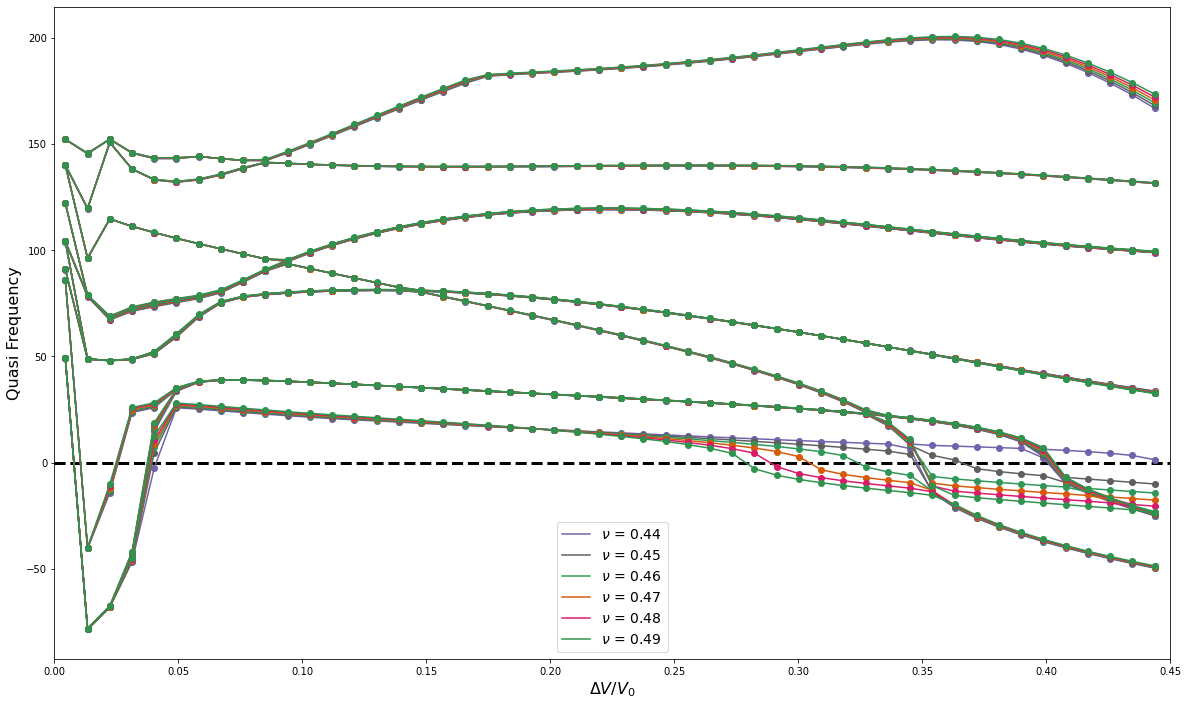

In [9]:
nu_try = [0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 670

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.45, 'k', '--', linewidth = 3)

for i,nu in enumerate(nu_try):
    if nu <=0.5 and nu >=0.44:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_nu-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.45)


fig.savefig('data_processed/change_nu_3folds_eigval_scale_v670.jpg')


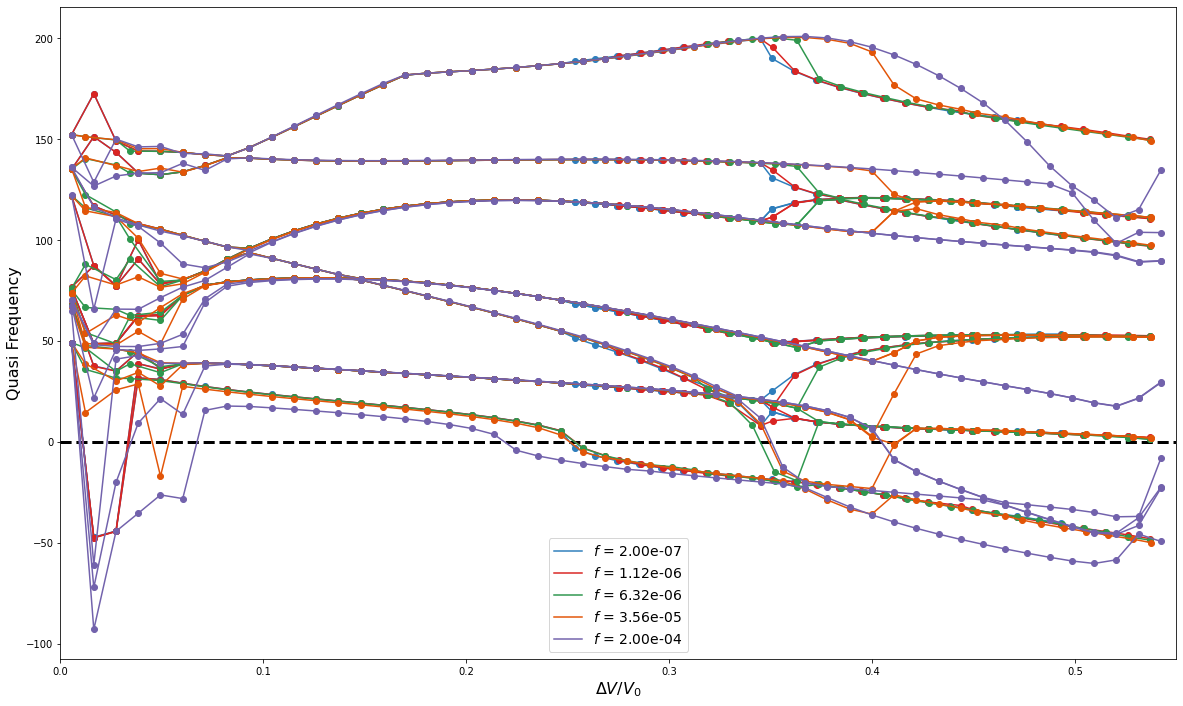

In [10]:
damping_sweep = 2*np.logspace(-7, -4, 5)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 200

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,stab_fac in enumerate(damping_sweep):
    if i < 5:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_static-stable-{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$f$ = {stab_fac:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.55)


fig.savefig('data_processed/static_stable_3folds.jpg')


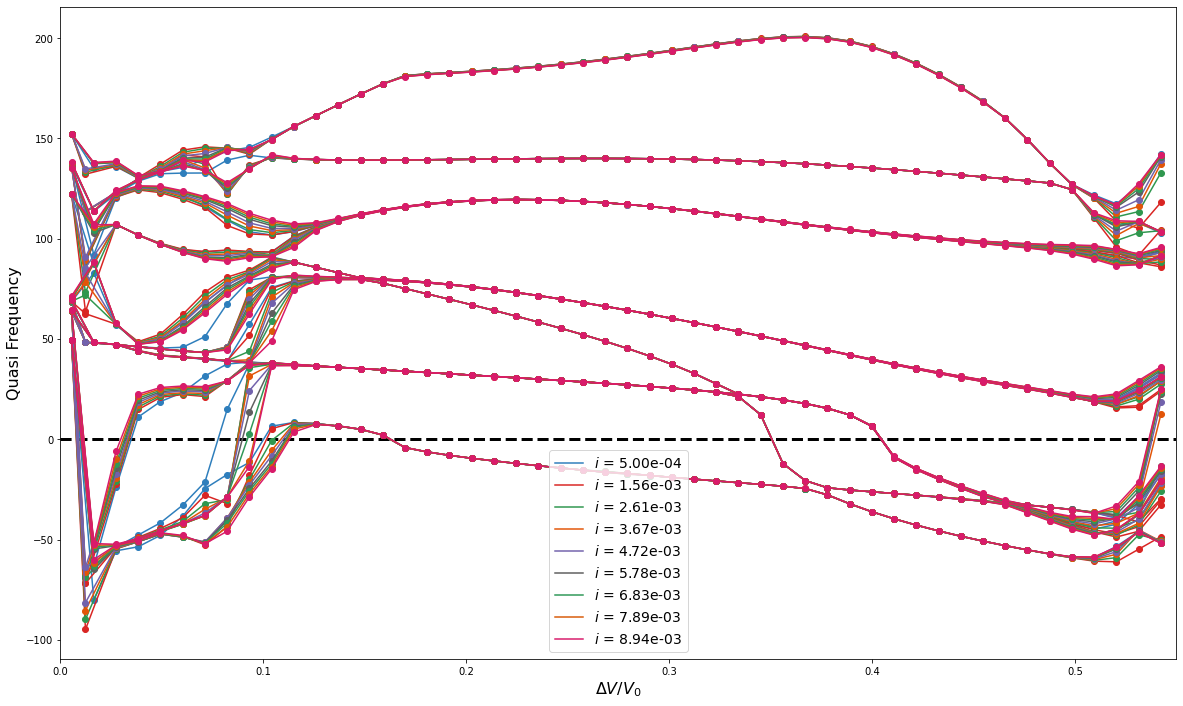

In [11]:
imper_second = np.linspace(0.0005, 0.01, 10)

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 500

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd', 'YlGn']

ax.hlines(0,0,0.55, 'k', '--', linewidth = 3)

for i,imper in enumerate(imper_second):
    if i < 9:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-multi-imper{idx_cur}_eig_val.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            freq_rescale = np.sign(freq_all[:,j]) * np.sqrt(np.abs(freq_all[:,j])) * 1/(2*np.pi)
            ax.plot(-3*temp_all, freq_rescale, 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot, label = rf'$i$ = {imper:.2e}')
            else:
                ax.plot(-3*temp_all, freq_rescale, '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Quasi Frequency', fontsize = 16)
ax.set_xlim(0,0.55)


fig.savefig('data_processed/imper_extra_3folds.jpg')


old data below here

In [11]:
data_3 = np.loadtxt('exp_results/PV_3f_Fig1.csv', skiprows = 2, delimiter = ',', usecols=(0,1,2,3,4))

vol_3 = np.mean(data_3[:,[0]], axis = 1)
pressure_3 = np.mean(data_3[:,[1,2,3,4]], axis = 1)

R_3 = 8 #mm
H_3 = 20 #mm

vol_03 = np.pi * R_3 * R_3 * H_3 * 1e-3 #mm^3 * 1000 should be cm^3 aka mL
vol_03


4.0212385965949355

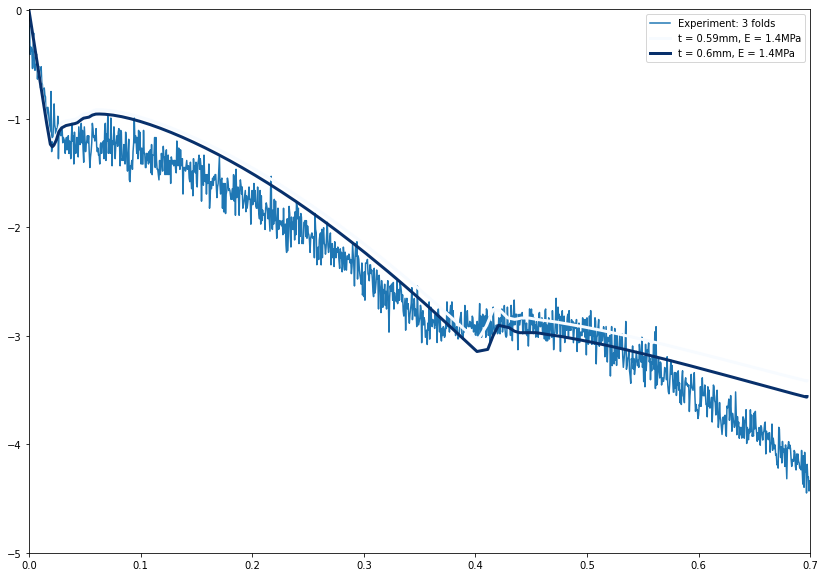

In [12]:
E_try = [1.4]
# t_try = [0.45, 0.5, 0.55, 0.60, 0.65]
# t_try = [0.56, 0.57, 0.58, 0.59, 0.60, 0.61, 0.62]
t_try = [0.59, 0.60]
initial_idx = 320

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03-0.02, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']

for i, E in enumerate(E_try):
    for j, t in enumerate(t_try):
        idx_cur = initial_idx + len(E_try)*i + j
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)
        
ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -5)

fig.savefig('scream yi/3folds_exp_vs_sims.png')

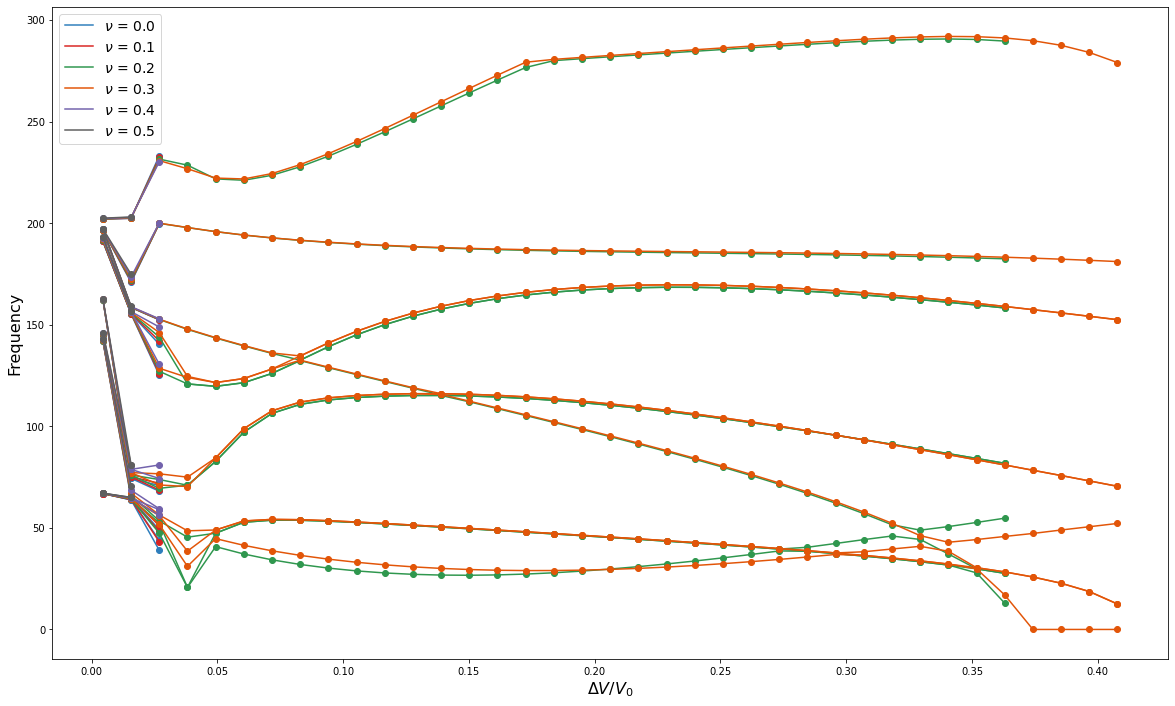

In [16]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))

initial_idx = 520

cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'YlOrBr', 'PuRd']

for i,nu in enumerate(nu_try):
    if nu >= 0.0:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_nu-{idx_cur}_eig_freq.txt'
        data_cur = np.loadtxt(data_path)
        temp_all = data_cur[:,0]
        freq_all = data_cur[:,1:]

        color_plot = plt.get_cmap(cmap_all[i])(0.7)

        for j in range(np.shape(freq_all)[1]):
            ax.plot(-3*temp_all, freq_all[:,j], 'o', color = color_plot)
            if j == 0:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot, label = rf'$\nu$ = {nu}')
            else:
                ax.plot(-3*temp_all, freq_all[:,j], '-', color = color_plot)



ax.legend(loc = 'best', fontsize = 14)
ax.set_xlabel('$\Delta V/V_0$', fontsize = 16)
ax.set_ylabel('Frequency', fontsize = 16)


fig.savefig('data_processed/change_nu_3folds_freq.jpg')


(0.1791464821222607, 0.49287197231833907, 0.7354248366013072, 1.0)
(0.8503344867358708, 0.14686658977316416, 0.13633217993079583, 1.0)
(0.18246828143021915, 0.5933256439830834, 0.3067589388696655, 1.0)
(0.8871510957324106, 0.3320876585928489, 0.03104959630911188, 1.0)
(0.4488427527873895, 0.3839600153787005, 0.6738792772010764, 1.0)
(0.3713033448673587, 0.3713033448673587, 0.3713033448673587, 1.0)


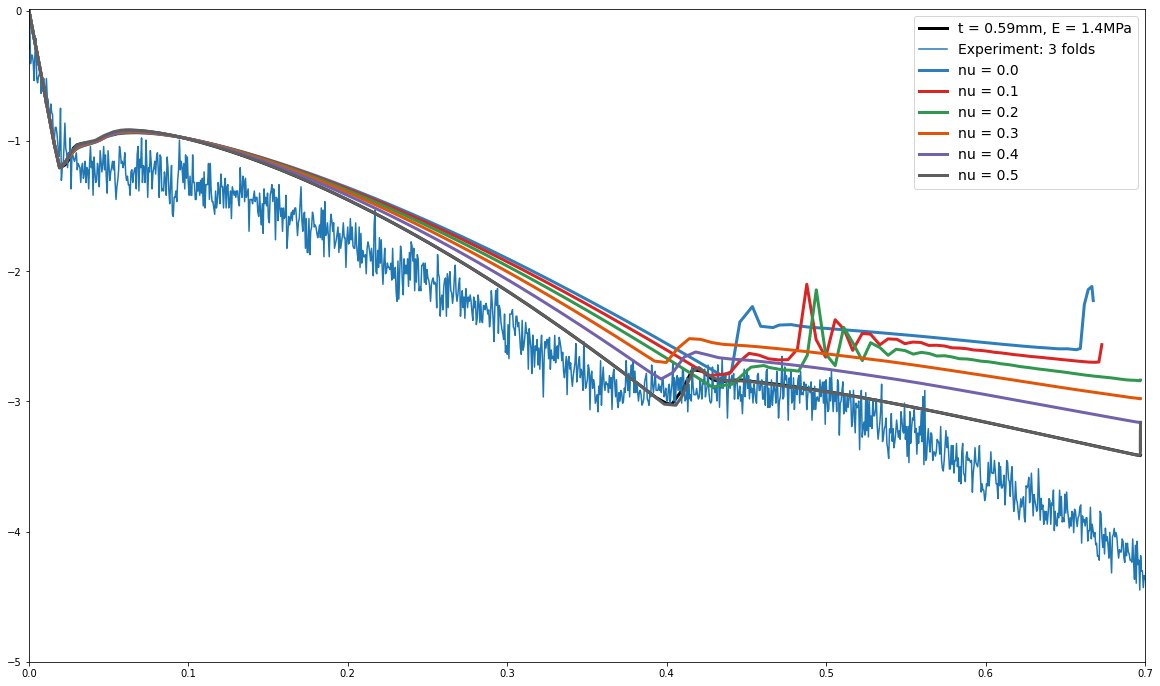

In [19]:
nu_try = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]

# fig, ax = plt.subplots(figsize = (14,10))
fig, ax = plt.subplots(figsize = (20,12))
# for i in range(1,np.shape(data_all)[1]):
#     ax.plot(vol_all/vol_0, data_all[:,i])
# ax.plot(-(vol_v113 - vol_v113[0])/vol_v113[0], pressure_v113, label = 'Dynamic Implicit: 4 folds') #v113
# ax.set_xlim(left = 0, right = 1.)
initial_idx = 520

data_cur = np.loadtxt(f'data_out/3fold-fitting-320_pcav_cvol.txt')
vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
pressure_kpa = data_cur[:,1] * 1e3

# print(j/(len(E_try) - 1))
ax.plot(vol_norm,pressure_kpa, label = f't = {0.59}mm, E = {1.4}MPa', color = 'k',linewidth = 3)


ax.plot(vol_3/vol_03-0.02, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples', 'Greys', 'BuGn', 'PuRd']

for i,nu in enumerate(nu_try):
    try:
        idx_cur = initial_idx + i
        data_path = f'data_out/3fold-test_nu-{idx_cur}_pcav_cvol.txt'
        data_cur = np.loadtxt(data_path)
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(0.7)
        print(color_plot)
        ax.plot(vol_norm,pressure_kpa, label = f'nu = {nu}', color = color_plot,
            linewidth = 3)
    except: pass


ax.legend(loc = 'best', fontsize = 14)
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -5)


fig.savefig('data_processed/change_nu_3folds.png')

(-2.5, 0.01)

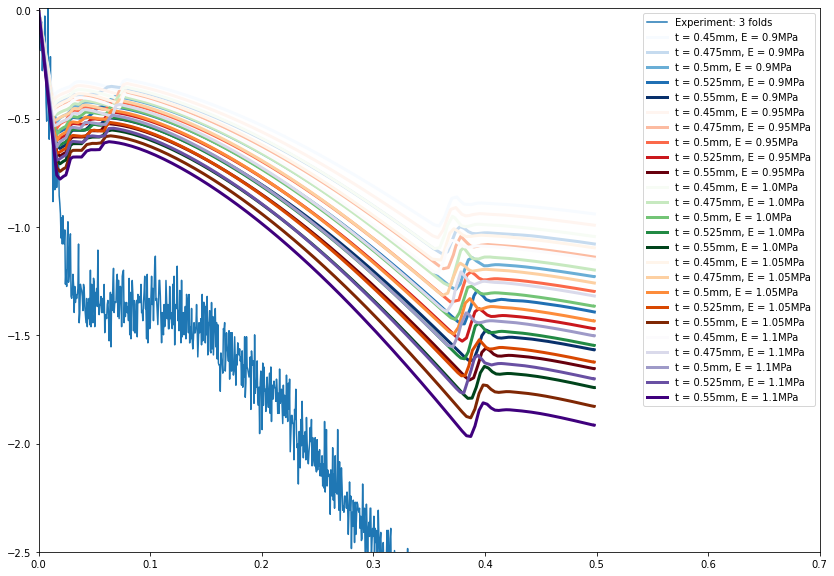

In [24]:
E_try = [0.9, 0.95, 1.0, 1.05, 1.1]
t_try = [0.45, 0.475, 0.5, 0.525, 0.55]
initial_idx = 100

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']

for i,E in enumerate(E_try):
    for j,t in enumerate(t_try):
        idx_cur = initial_idx + len(E_try)*i + j
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -2.5)

(-3.5, 0.01)

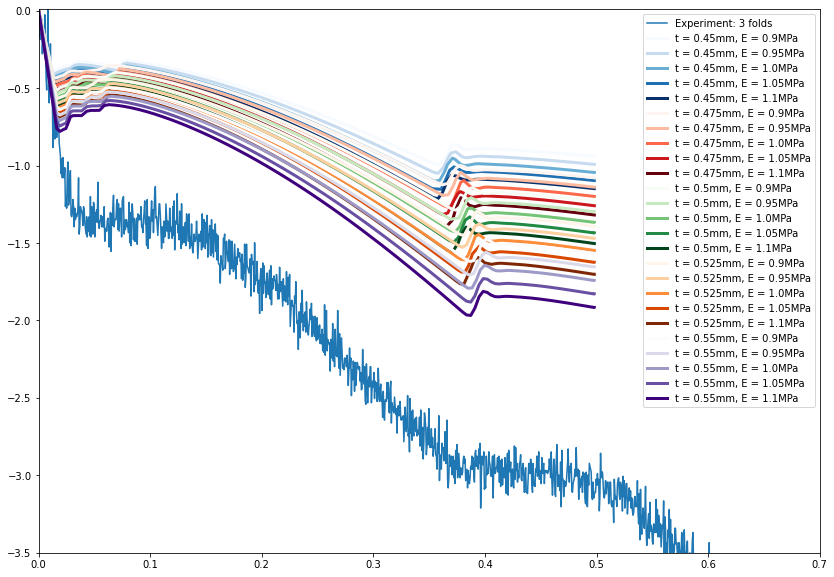

In [28]:
E_try = [0.9, 0.95, 1.0, 1.05, 1.1]
t_try = [0.45, 0.475, 0.5, 0.525, 0.55]
initial_idx = 100

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(E_try)*j + i
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3.5)

(-3.5, 0.01)

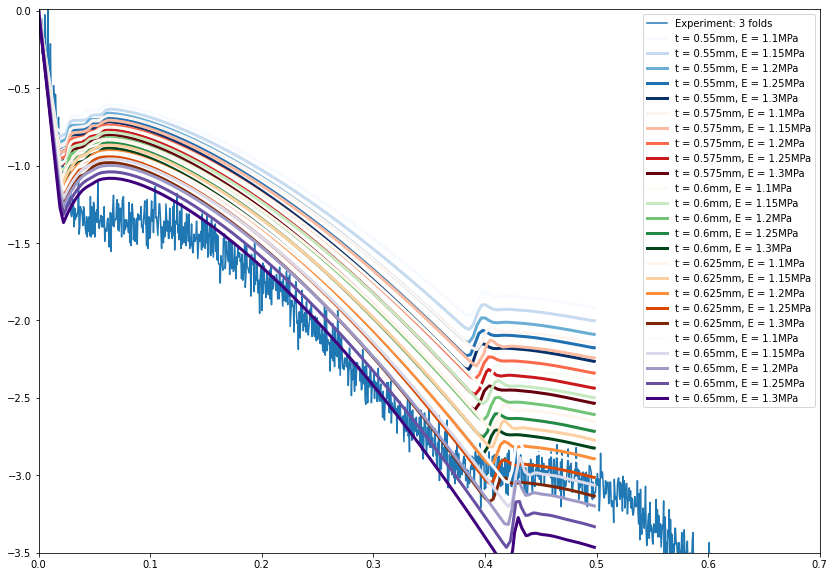

In [92]:
E_try = [1.1, 1.15, 1.2, 1.25, 1.3]
t_try = [0.55, 0.575, 0.6, 0.625, 0.65]
initial_idx = 200

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(E_try)*j + i
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3.5)

# ax.set_xlim(left = 0, right = 0.1)
# ax.set_ylim(top = 0.01, bottom = -2)

(1800,)

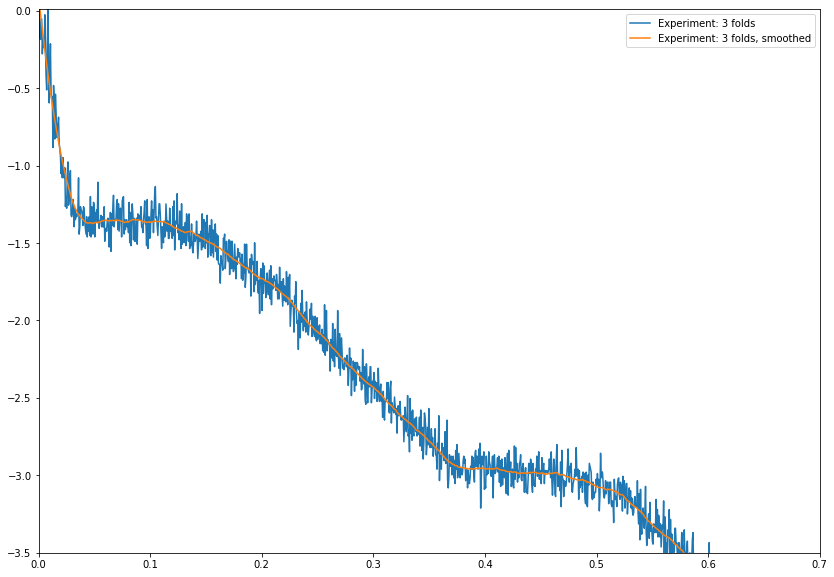

In [53]:
window_len = 100
poly_order = 2
pressure_3_smooth = savgol_filter(pressure_3, window_len, poly_order)

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
ax.plot(vol_3/vol_03, pressure_3_smooth, label = 'Experiment: 3 folds, smoothed')
#volume is also an average but in significantly less noisy in comparison

ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3.5)

np.shape(pressure_3_smooth)

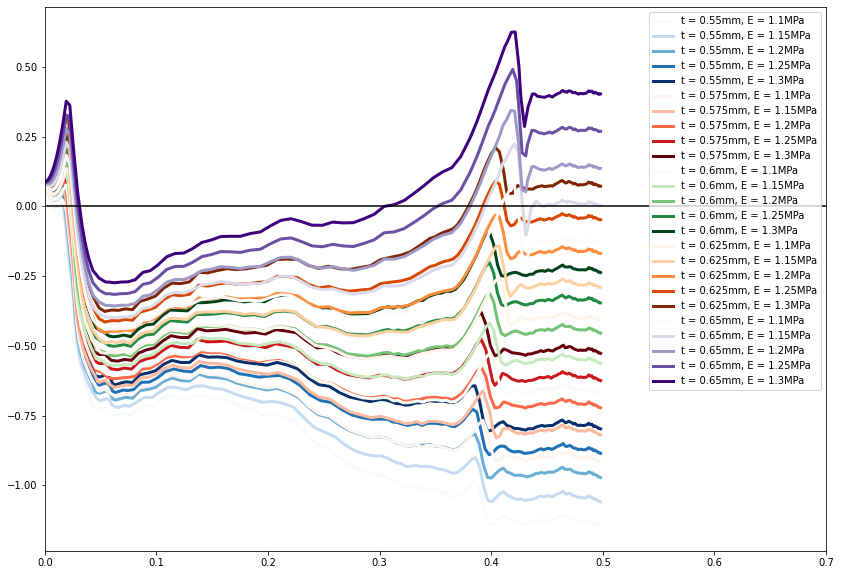

In [93]:
'''Error computation: first as a fxn of time but also on average'''

E_try = [1.1, 1.15, 1.2, 1.25, 1.3]
t_try = [0.55, 0.575, 0.6, 0.625, 0.65]
initial_idx = 200

fig, ax = plt.subplots(figsize = (14,10))
res_all = np.zeros((len(E_try),len(t_try)))
# ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']


for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(E_try)*j + i
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        sim_data_len = len(pressure_kpa)

        #downsample exp data to match sim data length
        pressure_exp_downsample = np.interp(vol_norm, vol_3/vol_03, pressure_3_smooth)
        
        error_cur = pressure_exp_downsample - pressure_kpa
        res_all[i,j] = np.linalg.norm(error_cur)


        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,error_cur, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)
ax.plot([0,0.7],[0,0],color = 'black')
ax.set_xlim(left = 0, right = 0.7)
ax.legend(loc = 'best');

In [63]:
res_all

array([[11.47866367, 10.74021897,  9.87651779,  9.11756649,  8.23325132],
       [ 9.26466011,  8.43640643,  7.41855983,  6.54374618,  5.63258963],
       [ 7.15695336,  6.1607028 ,  5.23285088,  4.28525712,  3.39188357],
       [ 4.86177629,  3.82023337,  2.99462768,  2.32944923,  2.08400643],
       [ 2.82055595,  2.26023301,  2.26830354,  2.85252626,  3.73633135]])

19

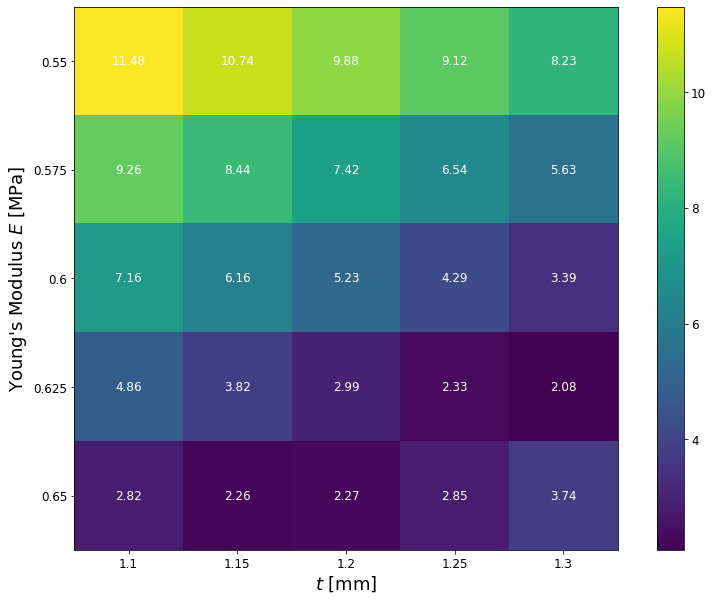

In [90]:
E_try = [1.1, 1.15, 1.2, 1.25, 1.3]
t_try = [0.55, 0.575, 0.6, 0.625, 0.65]

#todo: there's a strong chance this is flipepd in some way pls fix/check

fig, ax = plt.subplots(figsize = (14,10))
cmap=plt.cm.viridis

cs = ax.imshow(res_all, cmap = cmap)
ax.set_yticks(np.arange(len(t_try)), labels=t_try, fontsize = 12)
ax.set_xticks(np.arange(len(E_try)), labels=E_try, fontsize = 12)
ax.set_xlabel("$t$ [mm]", fontsize = 18)
ax.set_ylabel("Young's Modulus $E$ [MPa]", fontsize = 18)

cbar = plt.colorbar(cs)
cbar.ax.tick_params(labelsize=12)

# cbar = plt.colorbar()
# cbar.solids.set_edgecolor("face")
# draw()

# Loop over data dimensions and create text annotations.
for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        text = ax.text(j, i, round(res_all[i, j],2),ha="center", va="center", color="w", fontsize = 12)

#(1.3,0.625) has min error but all errors are quite large?
#i is t and j is E